# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="



In [6]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:



# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Laguna
Processing Record 2 | Zhezkazgan
Processing Record 3 | Ilulissat
Processing Record 4 | Constitución
Processing Record 5 | Albany
City not found. Skipping...
Processing Record 6 | Qaanaaq
Processing Record 7 | Bredasdorp
Processing Record 8 | Ancud
Processing Record 9 | Punta Arenas
Processing Record 10 | San Patricio
Processing Record 11 | Cape Town
Processing Record 12 | Banjar
Processing Record 13 | East London
Processing Record 14 | Castro
Processing Record 15 | Atuona
Processing Record 16 | Acapulco de Juárez
Processing Record 17 | Dakoro
Processing Record 18 | Ucluelet
Processing Record 19 | Ushuaia
Processing Record 20 | Itarema
Processing Record 21 | Flinders
Processing Record 22 | Sambava
City not found. Skipping...
City not found. Skipping...
Processing Record 23 | Ashland
Processing Record 24 | Waipawa
Processing Record 25 | Faxe Ladeplads
Processing Record 26 | Flin Flon
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# Creatng a DataFrame for cvs file 
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City               571
Country            571
Date               571
Latitude           571
Longitude          571
Max Temperature    571
Humidity           571
Cloudiness         571
Wind Speed         571
dtype: int64

In [45]:

weather_df.head(5)

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Laguna,US,1616296325,38.4210,-121.4238,54.00,50,1,2.37
1,Zhezkazgan,KZ,1616296325,47.8043,67.7144,28.56,92,92,8.93
2,Ilulissat,GL,1616296094,69.2167,-51.1000,19.40,68,75,6.91
3,Constitución,CL,1616296131,-35.3333,-72.4167,55.47,79,94,5.37
4,Albany,US,1616296115,42.6001,-73.9662,42.80,36,1,5.32


In [46]:
# Save Data Into a .csv.
weather_df.to_csv("../new_cvs_files/weather_data.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
#This indicates that there are 0 cities have a humidity > 100%
clean_city_data = weather_df[weather_df.Humidity > 100]
clean_city_data

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed


In [39]:
#  Get the indices of cities that have humidity over 100%.


NameError: name 'Int64Index' is not defined

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

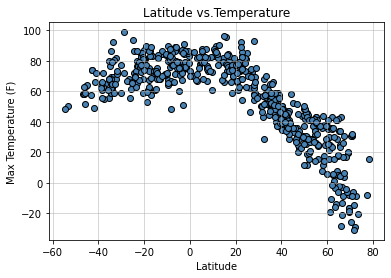

In [57]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Latitude"], weather_dict["Max Temperature"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs.Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Temp.png")

## Latitude vs. Humidity Plot

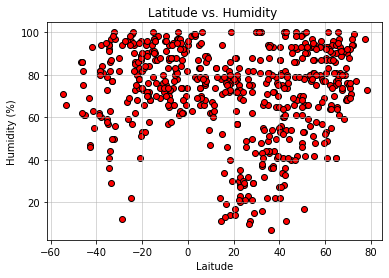

In [63]:
# Creating  Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Latitude"], weather_dict["Humidity"], facecolor = "red", edgecolor = "black")

# Set title
plt.title("Latitude vs. Humidity ")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = .5)

# Saved as png file 
plt.savefig("../Images/Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

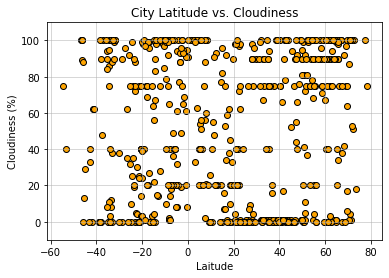

In [67]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Latitude"], weather_dict["Cloudiness"], facecolor = "orange", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-10,110)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

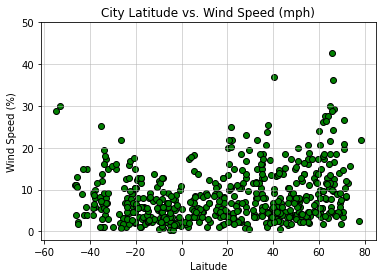

In [69]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Latitude"], weather_dict["Wind Speed"], facecolor = "green", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Wind Speed.png")

## Linear Regression

In [84]:
# Setting up Northern and Southern Hemisphere DataFrame
northern_hemi = weather_dict[weather_dict["Latitude"] >= 0]
southern_hemi = weather_dict[weather_dict["Latitude"] < 0]

TypeError: '>=' not supported between instances of 'list' and 'int'

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression